In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
from keras.layers.core import Dropout
from tensorflow.keras.models import Sequential
from keras.datasets import mnist
from keras import optimizers
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.layers.core import Activation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,explained_variance_score,mean_absolute_error,explained_variance_score,r2_score,mean_squared_error


In [3]:
diamond = pd.read_csv("diamonds.csv")
diamond = diamond.drop('id',axis=1)
diamond.isnull().sum()
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print(diamond.dtypes)
diamond_othercolumns=diamond.drop('price',axis=1)
diamond_price=diamond['price']

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [5]:
diamond.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [6]:
diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
diamond = pd.get_dummies(diamond, columns=['cut'])
diamond = pd.get_dummies(diamond, columns=['clarity'])
diamond = pd.get_dummies(diamond, columns=['color'])

diamond.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
X = diamond.drop('price',axis=1).values
Y = diamond_price.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape[1])

26


<AxesSubplot: >

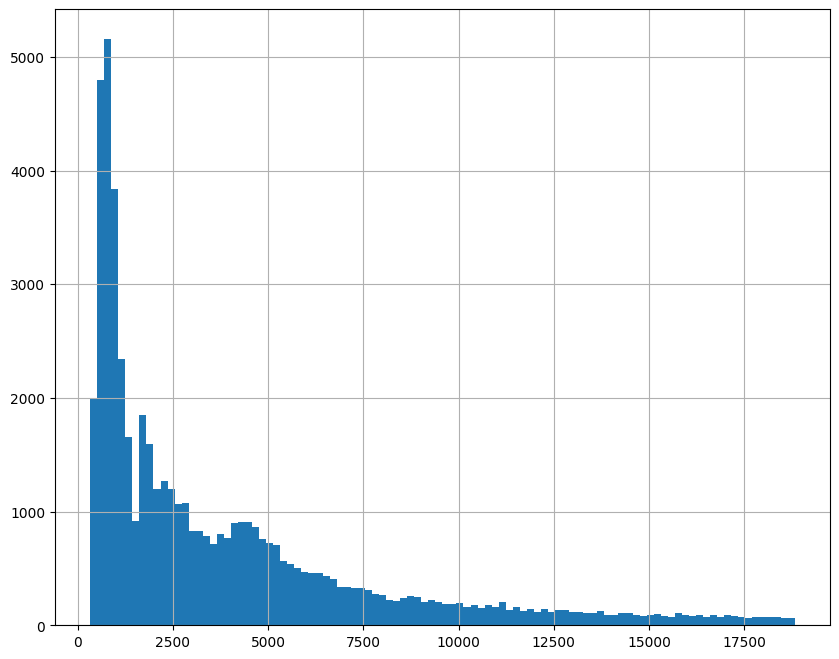

In [10]:
diamond['price'].hist(bins=100, figsize=(10,8))

Text(0.5, 1.0, 'Korelasyon Matrisi')

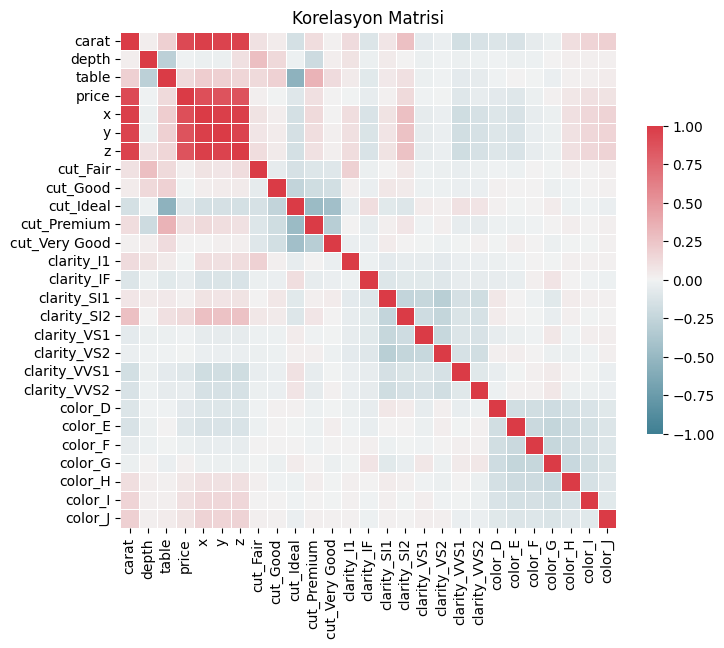

In [11]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(diamond.corr(), cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Korelasyon Matrisi')

In [12]:
#MODEL 1

In [13]:
X = diamond.drop('price',axis=1).values
Y = diamond_price.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape[1])

26


In [15]:
print(X.shape,Y.shape)

(53940, 26) (53940,)


In [16]:
mod1 = Sequential()
mod1.add(Dense(60, activation='relu',input_dim=X_train.shape[1]))
mod1.add(Dense(45,activation='relu'))
mod1.add(Dense(30,activation='relu'))
mod1.add(Dense(15,activation='relu'))
mod1.add(Dense(1))
mod1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1620      
                                                                 
 dense_1 (Dense)             (None, 45)                2745      
                                                                 
 dense_2 (Dense)             (None, 30)                1380      
                                                                 
 dense_3 (Dense)             (None, 15)                465       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 6,226
Trainable params: 6,226
Non-trainable params: 0
_________________________________________________________________


In [17]:
lr=0.2
num_epochs = 20
adam0=Adam(lr=lr)
batch_size=512
mod1.compile(optimizer=adam0,loss='mean_absolute_error')
history=mod1.fit(X_train,Y_train, validation_data=(X_test,Y_test),batch_size=batch_size,epochs=num_epochs,validation_split=0.2)
preds = mod1.predict(X_test)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
74/74 [==============================] - 2s 10ms/step - loss: 3373.5447 - val_loss: 2839.9009
Epoch 2/20
74/74 [==============================] - 0s 6ms/step - loss: 2798.7173 - val_loss: 2834.4446
Epoch 3/20
74/74 [==============================] - 0s 5ms/step - loss: 2797.7986 - val_loss: 2834.6541
Epoch 4/20
74/74 [==============================] - 0s 5ms/step - loss: 2798.3579 - val_loss: 2833.6941
Epoch 5/20
74/74 [==============================] - 0s 5ms/step - loss: 2798.9417 - val_loss: 2835.6985
Epoch 6/20
74/74 [==============================] - 0s 5ms/step - loss: 2801.2656 - val_loss: 2836.6975
Epoch 7/20
74/74 [==============================] - 0s 5ms/step - loss: 2799.0327 - val_loss: 2835.4980
Epoch 8/20
74/74 [==============================] - 0s 5ms/step - loss: 2799.4973 - val_loss: 2833.9861
Epoch 9/20
74/74 [==============================] - 0s 5ms/step - loss: 2800.0105 - val_loss: 2838.6897
Epoch 10/20
74/74 [==============================] - 0s 5ms/ste

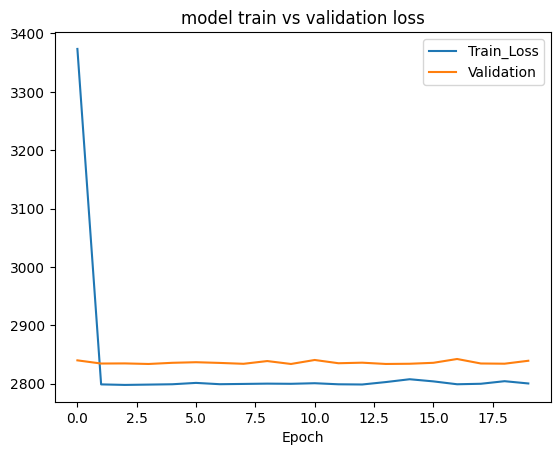

In [18]:
plt.plot(history.history['loss'],label='try')
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Validation'], loc='upper right')
plt.show()
plt.close()

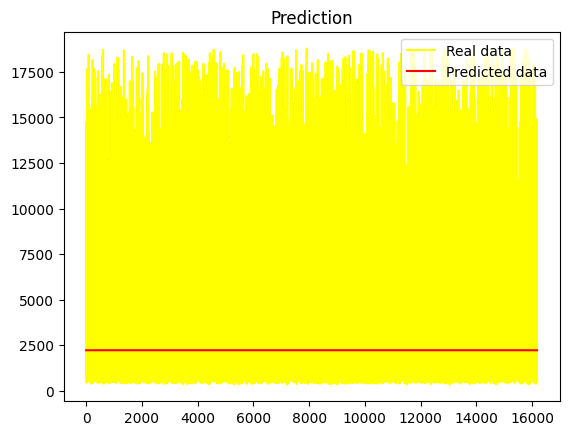

In [20]:
plt.plot(Y_test, color = 'yellow', label = 'Real data')
plt.plot(preds, color = 'red', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
plt.close()


In [20]:
np.set_printoptions(precision=2)
y_pred = mod1.predict(X_test)
np.concatenate((y_pred,Y_test.reshape(-1,1)),1)

506/506 [==============================] - 0s 923us/step


array([[1637.78, 1781.  ],
       [4286.14, 4452.  ],
       [ 554.85,  631.  ],
       ...,
       [ 533.39,  612.  ],
       [ 788.46,  734.  ],
       [ 483.79,  526.  ]])

In [21]:
y_pred = mod1.predict(X_test)
print("MODEL 1")
print("-------")
print("Hidden Layer : 5")
print("Learning Rate:", lr)
print("Epoch:",num_epochs)
print("Batch size:",batch_size)
print('r_square: ', r2_score(Y_test, y_pred))
print('mean_absolute_error: ', mean_absolute_error(Y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(Y_test, y_pred))
print('explained_variance_score: ', explained_variance_score(Y_test, y_pred))

506/506 [==============================] - 1s 2ms/step
MODEL 1
-------
Hidden Layer : 5
Learning Rate: 0.2
Epoch: 20
Batch size: 512
r_square:  -0.19036444823356358
mean_absolute_error:  2839.1921577118865
mean_squared_error:  19139702.07417439
explained_variance_score:  0.0


In [1]:
## MODEL 2

In [25]:
mode2 = Sequential()
mode2.add(Dense(30, activation='relu',input_dim=X_train.shape[1]))
mode2.add(Dense(25,activation='relu'))
mode2.add(Dense(20,activation='relu'))
mode2.add(Dense(15,activation='relu'))
mode2.add(Dense(1))
mode2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                810       
                                                                 
 dense_21 (Dense)            (None, 25)                775       
                                                                 
 dense_22 (Dense)            (None, 20)                520       
                                                                 
 dense_23 (Dense)            (None, 15)                315       
                                                                 
 dense_24 (Dense)            (None, 1)                 16        
                                                                 
Total params: 2,436
Trainable params: 2,436
Non-trainable params: 0
_________________________________________________________________


In [27]:
lr=0.2
num_epochs = 20
adam0=Adam(lr=lr)
batch_size=512
mode2.compile(optimizer=adam0,loss='mean_absolute_error')
history=mode2.fit(X_train,Y_train, validation_data=(X_test,Y_test),batch_size=batch_size,epochs=num_epochs,validation_split=0.2)
preds = mode2.predict(X_test)

Epoch 1/20
74/74 [==============================] - 1s 9ms/step - loss: 1902.7150 - val_loss: 471.1897
Epoch 2/20
74/74 [==============================] - 0s 5ms/step - loss: 456.2773 - val_loss: 582.9257
Epoch 3/20
74/74 [==============================] - 0s 5ms/step - loss: 395.5763 - val_loss: 369.1560
Epoch 4/20
74/74 [==============================] - 0s 5ms/step - loss: 392.4227 - val_loss: 414.6436
Epoch 5/20
74/74 [==============================] - 0s 5ms/step - loss: 375.2229 - val_loss: 353.5036
Epoch 6/20
74/74 [==============================] - 0s 4ms/step - loss: 370.3638 - val_loss: 373.7634
Epoch 7/20
74/74 [==============================] - 0s 4ms/step - loss: 404.7777 - val_loss: 450.4633
Epoch 8/20
74/74 [==============================] - 0s 4ms/step - loss: 363.1544 - val_loss: 342.9535
Epoch 9/20
74/74 [==============================] - 0s 4ms/step - loss: 375.9926 - val_loss: 409.4745
Epoch 10/20
74/74 [==============================] - 0s 4ms/step - loss: 366.4126

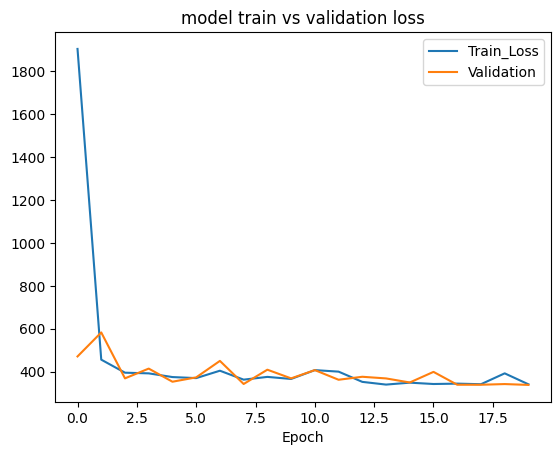

In [28]:
plt.plot(history.history['loss'],label='try')
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Validation'], loc='upper right')
plt.show()
plt.close()

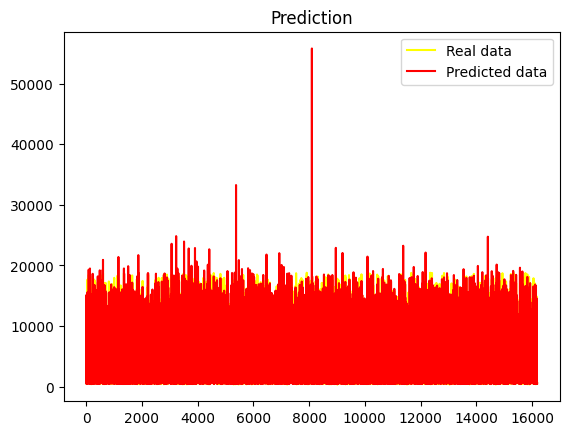

In [29]:
plt.plot(Y_test, color = 'yellow', label = 'Real data')
plt.plot(preds, color = 'red', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
plt.close()

In [30]:
np.set_printoptions(precision=2)
y_pred = mode2.predict(X_test)
np.concatenate((y_pred,Y_test.reshape(-1,1)),1)

506/506 [==============================] - 1s 2ms/step


array([[1637.94, 1781.  ],
       [4251.56, 4452.  ],
       [ 494.3 ,  631.  ],
       ...,
       [ 474.26,  612.  ],
       [ 735.7 ,  734.  ],
       [ 469.67,  526.  ]])

In [40]:
y_pred = mode2.predict(X_test)
print("MODEL 2")
print("-------")
print("Hidden Layer : 5")
print("Learning Rate:", lr)
print("Epoch:",num_epochs)
print("Batch size:",batch_size)
print('r_square: ', r2_score(Y_test, y_pred))
print('mean_absolute_error: ', mean_absolute_error(Y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(Y_test, y_pred))
print('explained_variance_score: ', explained_variance_score(Y_test, y_pred))

506/506 [==============================] - 1s 2ms/step
MODEL 2
-------
Hidden Layer : 5
Learning Rate: 0.2
Epoch: 100
Batch size: 1024
r_square:  0.9607297922693815
mean_absolute_error:  338.6249004944398
mean_squared_error:  631420.1314314632
explained_variance_score:  0.9608674340762136


In [34]:
mode3 = Sequential()
mode3.add(Dense(30, activation='relu',input_dim=X_train.shape[1]))
mode3.add(Dense(25,activation='relu'))
mode3.add(Dense(20,activation='relu'))
mode3.add(Dense(15,activation='relu'))
mode3.add(Dense(1))
mode3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 30)                810       
                                                                 
 dense_31 (Dense)            (None, 25)                775       
                                                                 
 dense_32 (Dense)            (None, 20)                520       
                                                                 
 dense_33 (Dense)            (None, 15)                315       
                                                                 
 dense_34 (Dense)            (None, 1)                 16        
                                                                 
Total params: 2,436
Trainable params: 2,436
Non-trainable params: 0
_________________________________________________________________


In [35]:
lr=0.2
num_epochs = 100
adam0=Adam(lr=lr)
batch_size=1024
mode3.compile(optimizer=adam0,loss='mean_absolute_error')
history=mode3.fit(X_train,Y_train, validation_data=(X_test,Y_test),batch_size=batch_size,epochs=num_epochs,validation_split=0.2)
preds = mode3.predict(X_test)

Epoch 1/100
37/37 [==============================] - 1s 13ms/step - loss: 2280.9602 - val_loss: 891.5175
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 627.3821 - val_loss: 373.7773
Epoch 3/100
37/37 [==============================] - 0s 7ms/step - loss: 359.7926 - val_loss: 350.1563
Epoch 4/100
37/37 [==============================] - 0s 7ms/step - loss: 399.9322 - val_loss: 377.8474
Epoch 5/100
37/37 [==============================] - 0s 7ms/step - loss: 678.0160 - val_loss: 1219.2603
Epoch 6/100
37/37 [==============================] - 0s 6ms/step - loss: 705.8768 - val_loss: 535.6202
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 434.1789 - val_loss: 340.3766
Epoch 8/100
37/37 [==============================] - 0s 6ms/step - loss: 331.8417 - val_loss: 332.3363
Epoch 9/100
37/37 [==============================] - 0s 6ms/step - loss: 332.8117 - val_loss: 337.5897
Epoch 10/100
37/37 [==============================] - 0s 6ms/step - lo

Epoch 80/100
37/37 [==============================] - 0s 5ms/step - loss: 330.5920 - val_loss: 329.8985
Epoch 81/100
37/37 [==============================] - 0s 6ms/step - loss: 320.4922 - val_loss: 347.5026
Epoch 82/100
37/37 [==============================] - 0s 6ms/step - loss: 364.8420 - val_loss: 378.0496
Epoch 83/100
37/37 [==============================] - 0s 6ms/step - loss: 322.2889 - val_loss: 327.1002
Epoch 84/100
37/37 [==============================] - 0s 6ms/step - loss: 321.8103 - val_loss: 324.9734
Epoch 85/100
37/37 [==============================] - 0s 6ms/step - loss: 334.9600 - val_loss: 374.8458
Epoch 86/100
37/37 [==============================] - 0s 6ms/step - loss: 343.3640 - val_loss: 390.2622
Epoch 87/100
37/37 [==============================] - 0s 6ms/step - loss: 324.1564 - val_loss: 336.7767
Epoch 88/100
37/37 [==============================] - 0s 6ms/step - loss: 320.7675 - val_loss: 373.8427
Epoch 89/100
37/37 [==============================] - 0s 5ms/ste

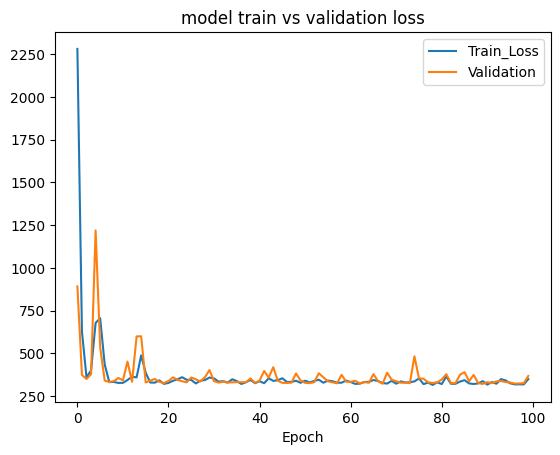

In [36]:
plt.plot(history.history['loss'],label='try')
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Validation'], loc='upper right')
plt.show()
plt.close()

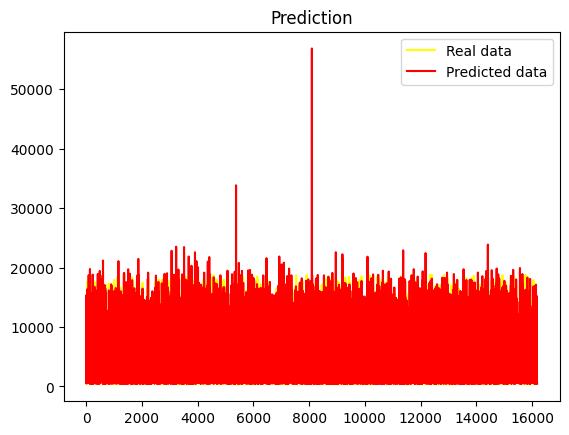

In [37]:
plt.plot(Y_test, color = 'yellow', label = 'Real data')
plt.plot(preds, color = 'red', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
plt.close()

In [38]:
np.set_printoptions(precision=2)
y_pred = mode3.predict(X_test)
np.concatenate((y_pred,Y_test.reshape(-1,1)),1)

506/506 [==============================] - 1s 2ms/step


array([[1652.19, 1781.  ],
       [4415.58, 4452.  ],
       [ 601.4 ,  631.  ],
       ...,
       [ 567.68,  612.  ],
       [ 776.9 ,  734.  ],
       [ 488.53,  526.  ]])

In [41]:
y_pred = mode3.predict(X_test)
print("MODEL 3")
print("-------")
print("Hidden Layer : 5")
print("Learning Rate:", lr)
print("Epoch:",num_epochs)
print("Batch size:",batch_size)
print('r_square: ', r2_score(Y_test, y_pred))
print('mean_absolute_error: ', mean_absolute_error(Y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(Y_test, y_pred))
print('explained_variance_score: ', explained_variance_score(Y_test, y_pred))

506/506 [==============================] - 1s 2ms/step
MODEL 3
-------
Hidden Layer : 5
Learning Rate: 0.2
Epoch: 100
Batch size: 1024
r_square:  0.9572492582735483
mean_absolute_error:  367.7858778487146
mean_squared_error:  687383.1466560334
explained_variance_score:  0.9599445928110879


In [42]:
##MODEL 4

In [44]:
mode4 = Sequential()
mode4.add(Dense(30, activation='relu',input_dim=X_train.shape[1]))
mode4.add(Dense(25,activation='relu'))
mode4.add(Dense(20,activation='relu'))
mode4.add(Dense(15,activation='relu'))
mode4.add(Dense(1))
mode4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 30)                810       
                                                                 
 dense_41 (Dense)            (None, 25)                775       
                                                                 
 dense_42 (Dense)            (None, 20)                520       
                                                                 
 dense_43 (Dense)            (None, 15)                315       
                                                                 
 dense_44 (Dense)            (None, 1)                 16        
                                                                 
Total params: 2,436
Trainable params: 2,436
Non-trainable params: 0
_________________________________________________________________


In [45]:
lr=0.2
num_epochs = 200
adam0=Adam(lr=lr)
batch_size=2048
mode4.compile(optimizer=adam0,loss='mean_absolute_error')
history=mode4.fit(X_train,Y_train, validation_data=(X_test,Y_test),batch_size=batch_size,epochs=num_epochs,validation_split=0.2)
preds = mode4.predict(X_test)

Epoch 1/200


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


19/19 [==============================] - 1s 23ms/step - loss: 2795.6477 - val_loss: 2164.1909
Epoch 2/200
19/19 [==============================] - 0s 9ms/step - loss: 1370.4045 - val_loss: 668.5870
Epoch 3/200
19/19 [==============================] - 0s 9ms/step - loss: 509.0094 - val_loss: 378.6001
Epoch 4/200
19/19 [==============================] - 0s 9ms/step - loss: 410.9089 - val_loss: 395.2177
Epoch 5/200
19/19 [==============================] - 0s 9ms/step - loss: 378.7298 - val_loss: 429.5488
Epoch 6/200
19/19 [==============================] - 0s 10ms/step - loss: 470.1873 - val_loss: 788.9255
Epoch 7/200
19/19 [==============================] - 0s 12ms/step - loss: 412.8442 - val_loss: 353.7174
Epoch 8/200
19/19 [==============================] - 0s 9ms/step - loss: 348.5713 - val_loss: 338.4053
Epoch 9/200
19/19 [==============================] - 0s 8ms/step - loss: 406.9424 - val_loss: 435.8872
Epoch 10/200
19/19 [==============================] - 0s 8ms/step - loss: 446.7

Epoch 80/200
19/19 [==============================] - 0s 7ms/step - loss: 316.9300 - val_loss: 321.4168
Epoch 81/200
19/19 [==============================] - 0s 8ms/step - loss: 317.0324 - val_loss: 322.1765
Epoch 82/200
19/19 [==============================] - 0s 8ms/step - loss: 318.8474 - val_loss: 318.2616
Epoch 83/200
19/19 [==============================] - 0s 8ms/step - loss: 313.8363 - val_loss: 345.2075
Epoch 84/200
19/19 [==============================] - 0s 7ms/step - loss: 345.3871 - val_loss: 353.4287
Epoch 85/200
19/19 [==============================] - 0s 7ms/step - loss: 347.1000 - val_loss: 324.6149
Epoch 86/200
19/19 [==============================] - 0s 8ms/step - loss: 358.2787 - val_loss: 401.9909
Epoch 87/200
19/19 [==============================] - 0s 7ms/step - loss: 330.5058 - val_loss: 327.8074
Epoch 88/200
19/19 [==============================] - 0s 12ms/step - loss: 313.2469 - val_loss: 330.7253
Epoch 89/200
19/19 [==============================] - 0s 8ms/st

19/19 [==============================] - 0s 8ms/step - loss: 308.6486 - val_loss: 315.6071
Epoch 159/200
19/19 [==============================] - 0s 8ms/step - loss: 309.1367 - val_loss: 321.0226
Epoch 160/200
19/19 [==============================] - 0s 8ms/step - loss: 315.1992 - val_loss: 319.3878
Epoch 161/200
19/19 [==============================] - 0s 8ms/step - loss: 307.6219 - val_loss: 319.8448
Epoch 162/200
19/19 [==============================] - 0s 8ms/step - loss: 305.7741 - val_loss: 334.0354
Epoch 163/200
19/19 [==============================] - 0s 8ms/step - loss: 309.2140 - val_loss: 312.0422
Epoch 164/200
19/19 [==============================] - 0s 9ms/step - loss: 310.1741 - val_loss: 320.4736
Epoch 165/200
19/19 [==============================] - 0s 8ms/step - loss: 315.8105 - val_loss: 325.7501
Epoch 166/200
19/19 [==============================] - 0s 8ms/step - loss: 307.9237 - val_loss: 309.7240
Epoch 167/200
19/19 [==============================] - 0s 8ms/step - 

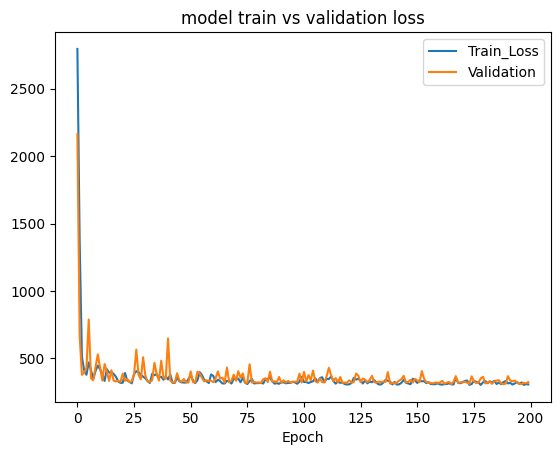

In [46]:
plt.plot(history.history['loss'],label='try')
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Validation'], loc='upper right')
plt.show()
plt.close()

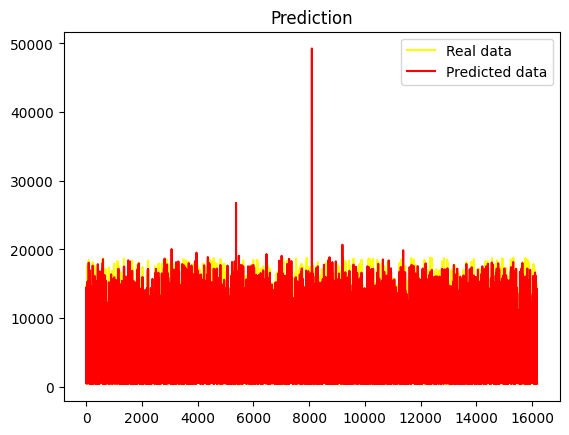

In [47]:
plt.plot(Y_test, color = 'yellow', label = 'Real data')
plt.plot(preds, color = 'red', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
plt.close()

In [48]:
np.set_printoptions(precision=2)
y_pred = mode4.predict(X_test)
np.concatenate((y_pred,Y_test.reshape(-1,1)),1)

506/506 [==============================] - 1s 2ms/step


array([[1534.91, 1781.  ],
       [4158.21, 4452.  ],
       [ 553.39,  631.  ],
       ...,
       [ 525.8 ,  612.  ],
       [ 737.4 ,  734.  ],
       [ 469.4 ,  526.  ]])

In [49]:
y_pred = mode4.predict(X_test)
print("MODEL 4")
print("-------")
print("Hidden Layer : 5")
print("Learning Rate:", lr)
print("Epoch:",num_epochs)
print("Batch size:",batch_size)
print('r_square: ', r2_score(Y_test, y_pred))
print('mean_absolute_error: ', mean_absolute_error(Y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(Y_test, y_pred))
print('explained_variance_score: ', explained_variance_score(Y_test, y_pred))

506/506 [==============================] - 1s 2ms/step
MODEL 4
-------
Hidden Layer : 5
Learning Rate: 0.2
Epoch: 200
Batch size: 2048
r_square:  0.9687369822625947
mean_absolute_error:  324.77792227517216
mean_squared_error:  502673.65286447125
explained_variance_score:  0.9691378122489991
